# Boston Housing Prices Analysis and Prediction
## Introduction
This notebook aims to provide insights and visualizations for the Boston housing prices dataset, clean the data, and apply several popular machine learning regression algorithms to predict housing prices. The performance of each model will be evaluated and compared.

## About The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate per 10,000 dollars
* **PTRATIO** - pupil-teacher ratio by town
* **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT** - % lower status of the population
* **MEDV** - Median value of owner-occupied homes in 1000 dollars's

### Target Column
In this dataset, the **target column** (the column we aim to predict using the other features) is MEDV (Median value of owner-occupied homes in 1000 dollars's). The goal of using this dataset is typically to develop a model that can estimate housing prices based on various influencing factors (features).

## Data Loading and Initial Exploration
First, we will load the dataset and perform some initial exploration to understand its structure and contents.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('boston.csv')

# Display the first few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.shape

(506, 14)

In [ ]:
# Check for missing values
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## Data Cleaning
Handling missing values and removing unnecessary columns. In this dataset, we decided to drop the CHAS and ZN columns based on their low correlation with the target variable and low feature importance.

In [ ]:
# Impute missing values with mean
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)
df.head()

<ipython-input-6-c465a1a8d5b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
<ipython-input-6-c465a1a8d5b9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


    Feature  Importance
5        RM    0.410413
12    LSTAT    0.395962
7       DIS    0.065570
0      CRIM    0.040014
4       NOX    0.019053
10  PTRATIO    0.016651
9       TAX    0.014775
6       AGE    0.014269
11        B    0.011367
2     INDUS    0.006101
8       RAD    0.003792
3      CHAS    0.001038
1        ZN    0.000995


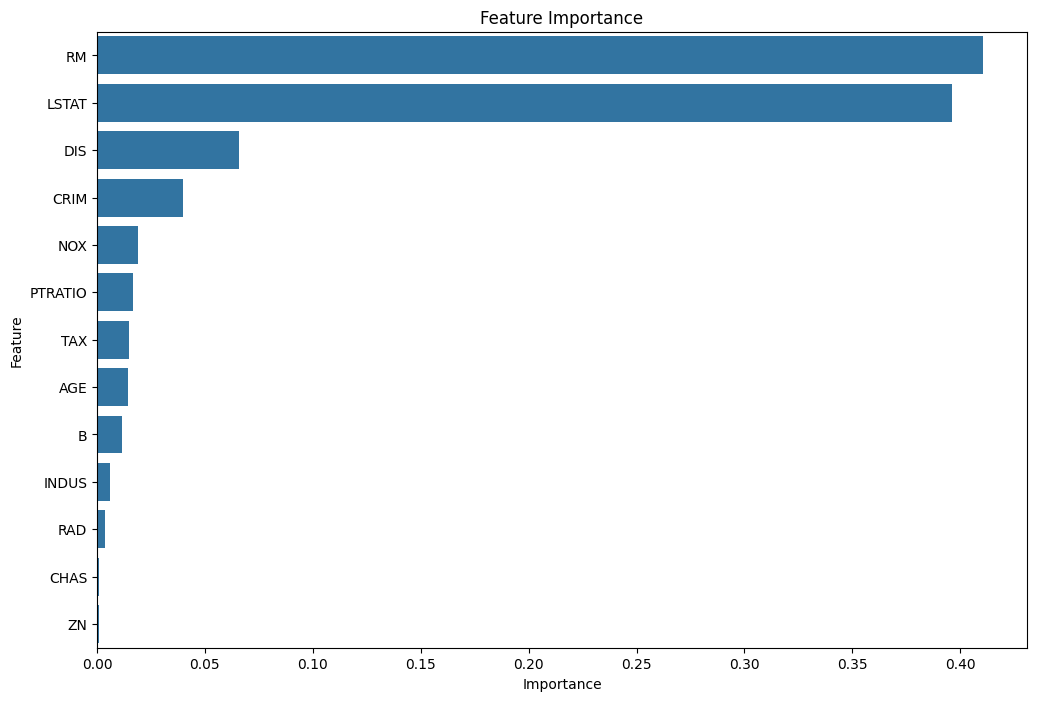

In [ ]:
# Analyzing the Impact of Dropping Columns "ZN" & "CHAS"
# feature importance
from sklearn.ensemble import RandomForestRegressor

# Prepare the data without dropping 'CHAS' and 'ZN'
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Fit a random forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


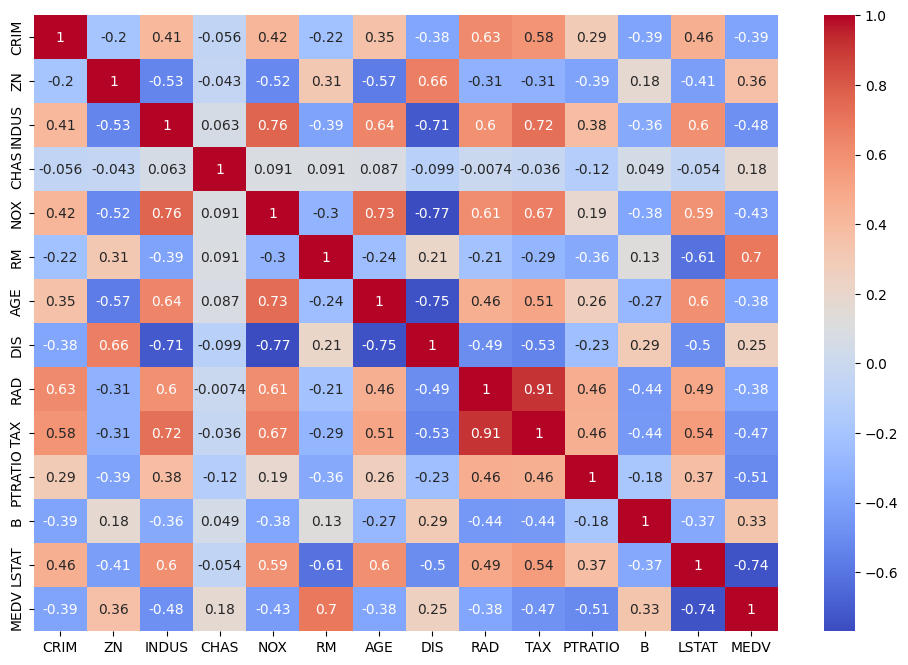

In [ ]:
# Analyzing the Impact of Dropping Columns "ZN" & "CHAS"
# Checking Correlations

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Drop the columns 'CHAS' and 'ZN'
df = df.drop(columns=['CHAS', 'ZN'])

# Verify the columns are dropped
df.head()


,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Visualization
Visualizing the correlations and distributions in the dataset.

### Correlation Matrix
The correlation matrix helps us understand the relationships between different features and the target variable (MEDV).

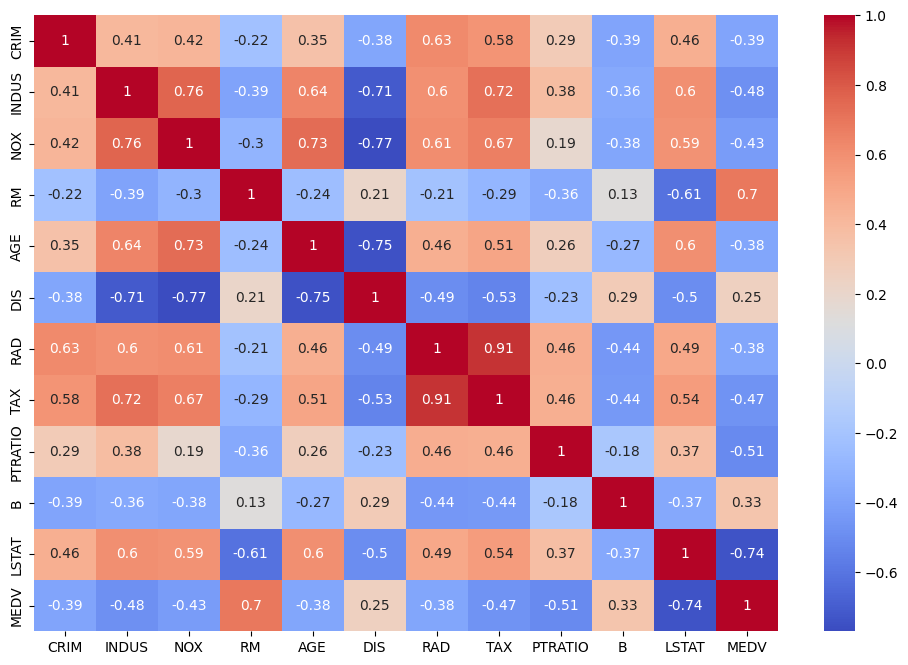

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Distribution of Prices (MEDV)
Visualizing the distribution of the target variable MEDV.

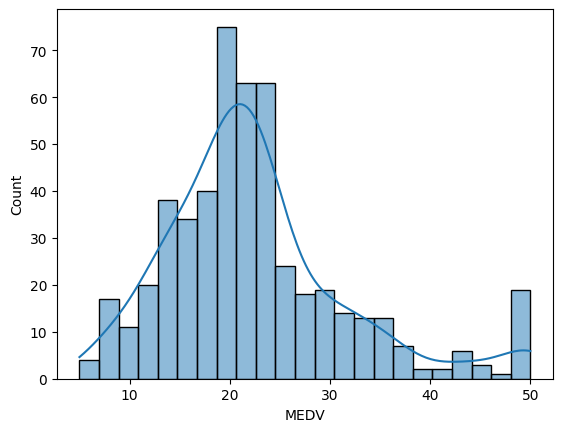

In [ ]:
sns.histplot(df['MEDV'], kde=True)
plt.show()


## Data Splitting
Splitting the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('MEDV', axis=1)  # Features
y = df['MEDV']  # Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying Machine Learning Models
We will apply three regression algorithms to predict the MEDV values: Linear Regression, Random Forest Regression, and Support Vector Regression.

## Linear Regression
Linear Regression is a simple and interpretable algorithm that assumes a linear relationship between the input features and the target variable.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

## Random Forest Regression
Random Forest is an ensemble method that uses multiple decision trees to improve the predictive performance and control overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

## Support Vector Regression (SVR)
Support Vector Regression attempts to find a hyperplane in an N-dimensional space that best fits the data, and it is particularly useful for high-dimensional spaces.

In [ ]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(x_train, y_train)
y_pred_svr = model_svr.predict(x_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
y_train_discrete = np.digitize(y_train, bins=np.histogram_bin_edges(y, bins=10))
y_test_discrete = np.digitize(y_test, bins=np.histogram_bin_edges(y, bins=10))

model_nb = GaussianNB()
model_nb.fit(x_train, y_train_discrete)
y_pred_nb_discrete = model_nb.predict(x_test)

In [ ]:
# Convert predicted categories back to a continuous format for comparison
# Using midpoints of bins
bins = np.histogram_bin_edges(y, bins=10)
bin_midpoints = (bins[:-1] + bins[1:]) / 2
# Clip values to be within the valid range of bin_midpoints
clipped_indices = np.clip(y_pred_nb_discrete - 1, 0, len(bin_midpoints) - 1)
y_pred_nb = bin_midpoints[clipped_indices]
mse_nb = mean_squared_error(y_test, y_pred_nb)
r2_nb = r2_score(y_test, y_pred_nb)

## Evaluating the Models
Evaluating the performance of each model using Mean Squared Error (MSE) and R-squared (R2) metrics.

In [ ]:
def print_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R2: {r2}")

print_metrics(y_test, y_pred_lr, 'Linear Regression')
print_metrics(y_test, y_pred_rf, 'Random Forest')
print_metrics(y_test, y_pred_svr, 'Support Vector Regression')
print_metrics(y_test, y_pred_svr, 'Decision Tree Regressor')
print_metrics(y_test, y_pred_nb_discrete, 'Naive Bayes')

Linear Regression - MSE: 26.014877435340267, R2: 0.6452538473507317
Random Forest - MSE: 8.595539656862748, R2: 0.882788814562163
Support Vector Regression - MSE: 54.05821340585986, R2: 0.26284706616488984
Decision Tree Regressor - MSE: 54.05821340585986, R2: 0.26284706616488984
Naive Bayes - MSE: 354.28, R2: -3.8310612753397697


## Visualizing Predictions vs Actuals
Visualizing the predictions versus actual values for each model.

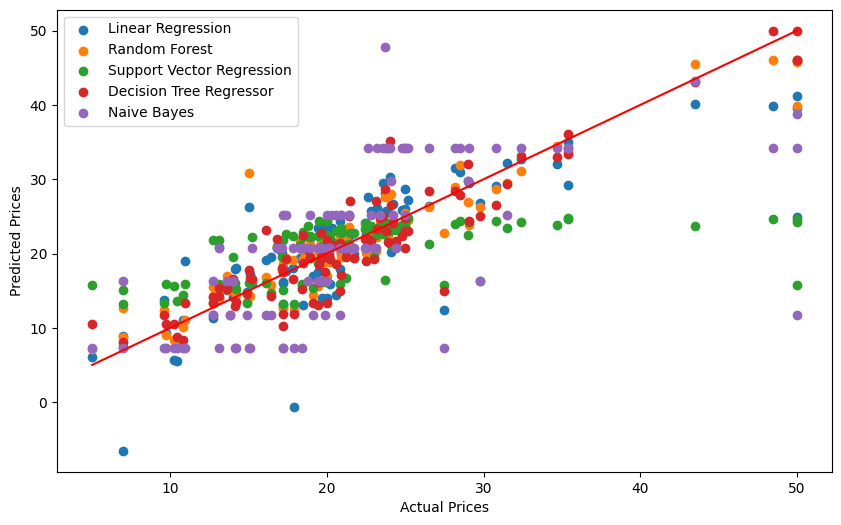

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.scatter(y_test, y_pred_svr, label='Support Vector Regression')
plt.scatter(y_test, y_pred_dt, label='Decision Tree Regressor')
plt.scatter(y_test, y_pred_nb, label='Naive Bayes')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()